In [1]:
#from ibm_quantum_widgets import CircuitComposer
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute, IBMQ, Aer, transpile, assemble
from numpy import pi
#from qiskit.visualization import plot_histogram

In [2]:
def encode_message(qc, qubit, mesg):
    
    # 00 <-> I
    # 01 <-> X
    # 10 <-> Z
    # 11 <-> ZX
    if mesg[1] == "1":
        qc.x(qubit)
    if mesg[0] == "1":
        qc.z(qubit)
        
    return qc

In [3]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

# Create Bell Pair
circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.barrier(qreg_q[0])

In [4]:
# Encode message into a qubit
#circuit.x(qreg_q[0])
mesg = '11'

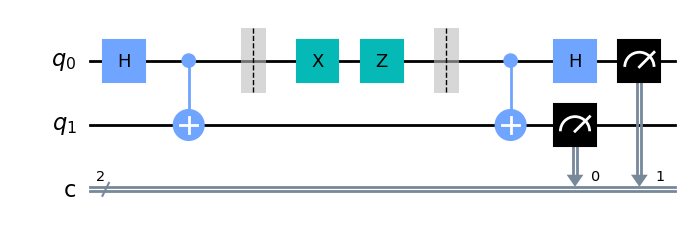

In [5]:
# Alice encodes the message
circuit = encode_message(circuit, qreg_q[0], mesg)
#circuit.z(qreg_q[0])
circuit.barrier(qreg_q[0])

# Decode message
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[1])
circuit.measure(qreg_q[1], creg_c[0])

#editor = CircuitComposer(circuit=circuit)
#editor
circuit.draw(output='mpl')


In [6]:
# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=1000)

# Grab results from the job
result = job.result()

# Return counts
counts = result.get_counts(circuit)
print("\nTotal count:",counts)


Total count: {'11': 1000}


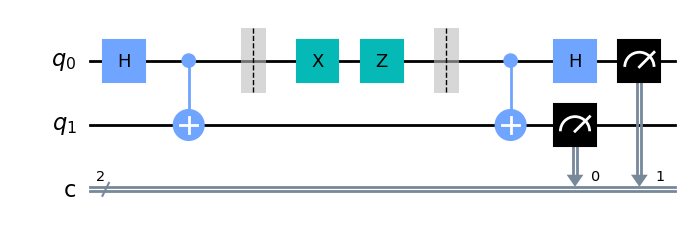

In [7]:
from qiskit.tools.visualization import plot_histogram
#from ibm_quantum_widgets import draw_circuit
#draw_circuit(circuit)
circuit.draw(output='mpl')
#circuit.draw()

# Analyze
#--------

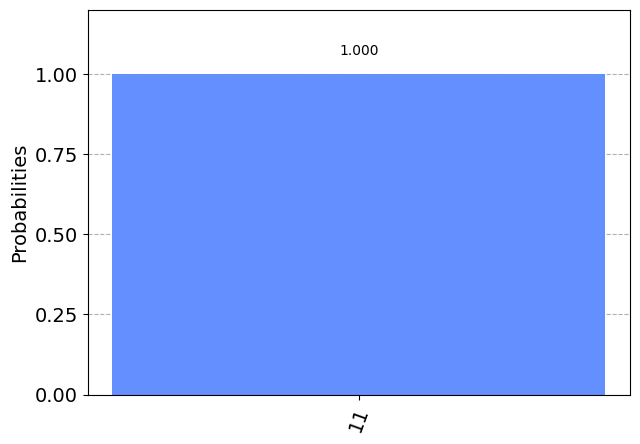

In [8]:
# Plot a histogram
plot_histogram(counts)

# Run on real QC

In [ ]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
shots = 1024

# Load local account information
IBMQ.load_account()
# Get the least busy backend
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)
# Run our circuit
t_qc = transpile(circuit, backend, optimization_level=3)
job = backend.run(t_qc)

In [ ]:
backend

In [ ]:
# Monitoring our job
from qiskit.tools.monitor import job_monitor
job_monitor(job)

In [ ]:
# Plotting our result
result = job.result()
plot_histogram(result.get_counts(qc))

In [ ]:
correct_results = result.get_counts(qc)[message]
accuracy = (correct_results/shots)*100
print(f"Accuracy = {accuracy:.2f}%")